# Data Preprocessing

In [25]:
import pandas as pd
import numpy as np

In [26]:
# load data
df = pd.read_csv('../1. Data Preparation/github_repo_features.csv', parse_dates=["created_at", "updated_at", "pushed_at"])

In [4]:
df.head()

,name,full_name,stars,forks,watchers,open_issues,size,has_wiki,has_projects,has_downloads,...,archived,created_at,updated_at,pushed_at,language,license,subscribers_count,contributors_count,commits_count,readme_size
0,freeCodeCamp,freeCodeCamp/freeCodeCamp,417516,39997,417516,283,497356,0,1,1,...,0,2014-12-24 17:49:19+00:00,2025-05-04 07:38:21+00:00,2025-05-03 11:08:48+00:00,TypeScript,bsd-3-clause,30,30,30,32109
1,build-your-own-x,codecrafters-io/build-your-own-x,377651,35155,377651,373,1061,0,0,1,...,0,2018-05-09 12:03:18+00:00,2025-05-04 07:38:32+00:00,2025-04-11 19:13:28+00:00,Markdown,NaN,30,30,30,45203
2,awesome,sindresorhus/awesome,358846,29028,358846,58,1485,0,0,1,...,0,2014-07-11 13:42:37+00:00,2025-05-04 07:35:07+00:00,2025-04-08 10:52:40+00:00,NaN,cc0-1.0,30,30,30,79018
3,free-programming-books,EbookFoundation/free-programming-books,356138,63279,356138,74,19455,0,0,1,...,0,2013-10-11 06:50:37+00:00,2025-05-04 07:22:44+00:00,2025-05-02 22:47:56+00:00,HTML,cc-by-4.0,30,30,30,15689
4,public-apis,public-apis/public-apis,338543,35717,338543,457,5030,0,0,1,...,0,2016-03-20 23:49:42+00:00,2025-05-04 07:12:05+00:00,2024-10-31 19:50:02+00:00,Python,mit,30,30,30,192180


In [7]:
df.columns

Index(['name', 'full_name', 'stars', 'forks', 'watchers', 'open_issues',
       'size', 'has_wiki', 'has_projects', 'has_downloads', 'is_fork',
       'archived', 'created_at', 'updated_at', 'pushed_at', 'language',
       'license', 'subscribers_count', 'contributors_count', 'commits_count',
       'readme_size'],
      dtype='object')

In [27]:
# Parse and normalize time-related features
date = pd.to_datetime("2025-5-01")
df["created_at"] = pd.to_datetime(df["created_at"]).dt.tz_localize(None)
df["updated_at"] = pd.to_datetime(df["updated_at"]).dt.tz_localize(None)
df["pushed_at"] = pd.to_datetime(df["pushed_at"]).dt.tz_localize(None)
df["project_age"] = (date - df["created_at"]).dt.days
df["days_since_update"] = (date - df["updated_at"]).dt.days
df["days_since_push"] = (date - df["pushed_at"]).dt.days

# Handle missing values
df["license"] = df["license"].fillna("None")
df["language"] = df["language"].fillna("Unknown")

# Derived rate-based features
df["forks_per_day"] = df["forks"] / (df["project_age"] + 1)
df["issues_per_day"] = df["open_issues"] / (df["project_age"] + 1)
df["update_rate"] = 1 / (1 + df["days_since_update"])

# Replace inf with NaN and drop rows with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Analysing the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class GitHubRepoAnalyzer:
    def __init__(self, df):
        self.df = df.copy()
        self.numeric_cols = [
            'stars', 'forks', 'watchers', 'open_issues',
            'size', 'subscribers_count', 
            'contributors_count', 'commits_count', 'readme_size',
            'project_age', 'days_since_update', 'days_since_push',
            'forks_per_day', 'issues_per_day', 'update_rate'
        ]
        self.categorical_cols = ['has_wiki', 'has_projects', 'has_downloads', 'is_fork',
            'archived', 'language', 'license']

    def plot_numeric_distributions(self):
        """Plot histograms of all numerical features"""
        self.df[self.numeric_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
        plt.suptitle("Numeric Feature Distributions")
        plt.tight_layout()
        plt.show()

    def plot_categorical_counts(self):
        """Plot the counts of all category-type or Boolean-type features"""
        n = len(self.categorical_cols)
        fig, axes = plt.subplots(nrows=(n + 1) // 2, ncols=2, figsize=(14, n * 2.5))
        axes = axes.flatten()
        for i, col in enumerate(self.categorical_cols):
            sns.countplot(data=self.df, x=col, ax=axes[i])
            axes[i].set_title(f"Count of {col}")
            axes[i].tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_correlation_heatmap(self):
        """Plot heat map of correlation coefficients between numerical features"""
        corr = self.df[self.numeric_cols].corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
        plt.title("Feature Correlation Heatmap")
        plt.show()
        
    def plot_pairplot(self, features=None):
        """Plot the scatterplot matrix between features"""
        sns.pairplot(self.df)
        plt.show()


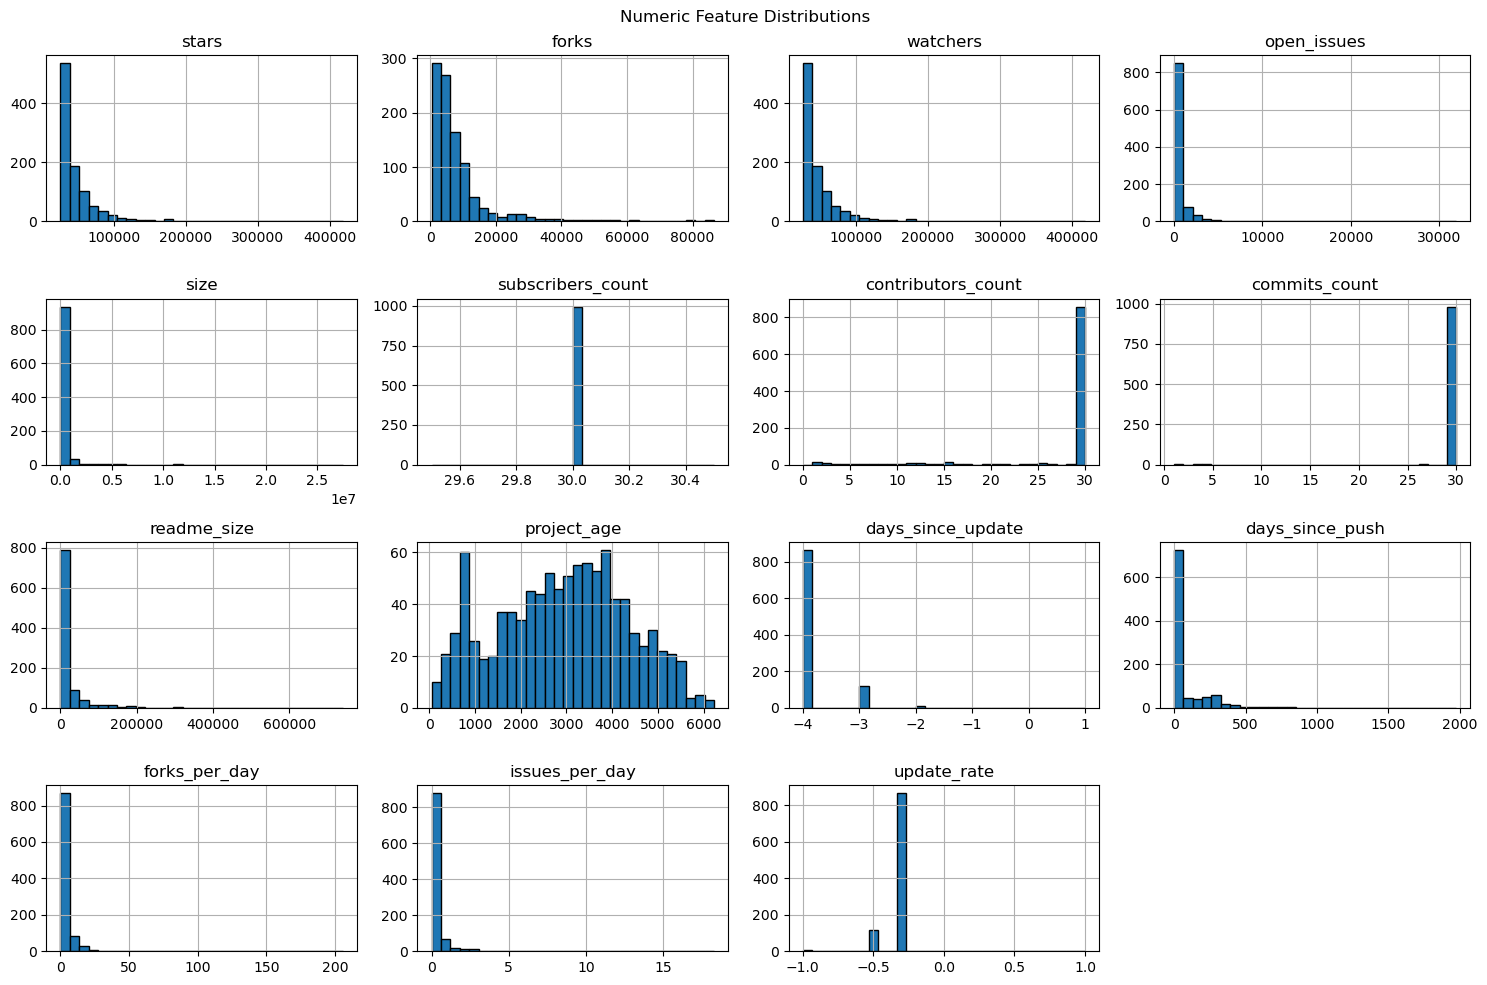

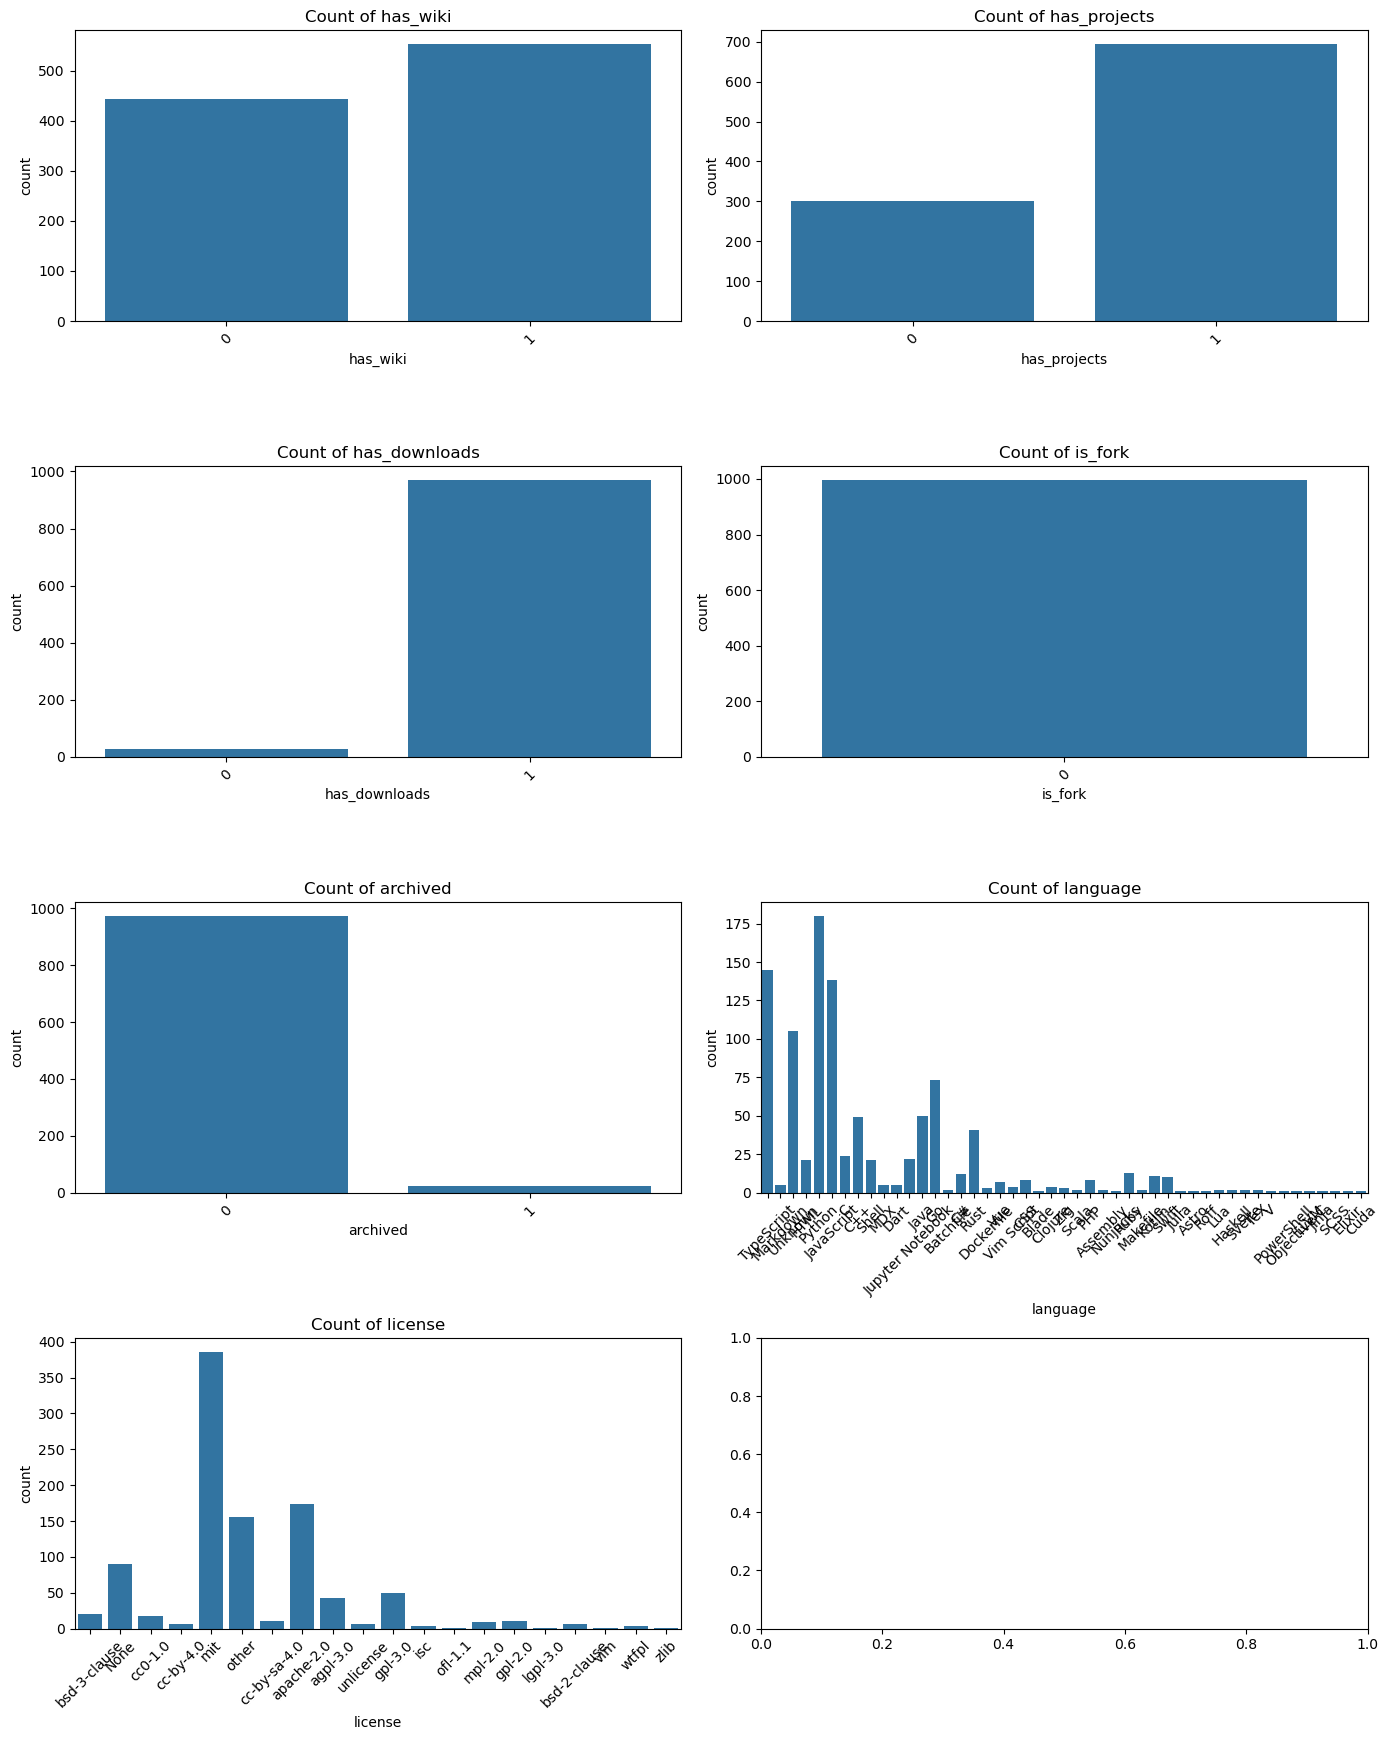

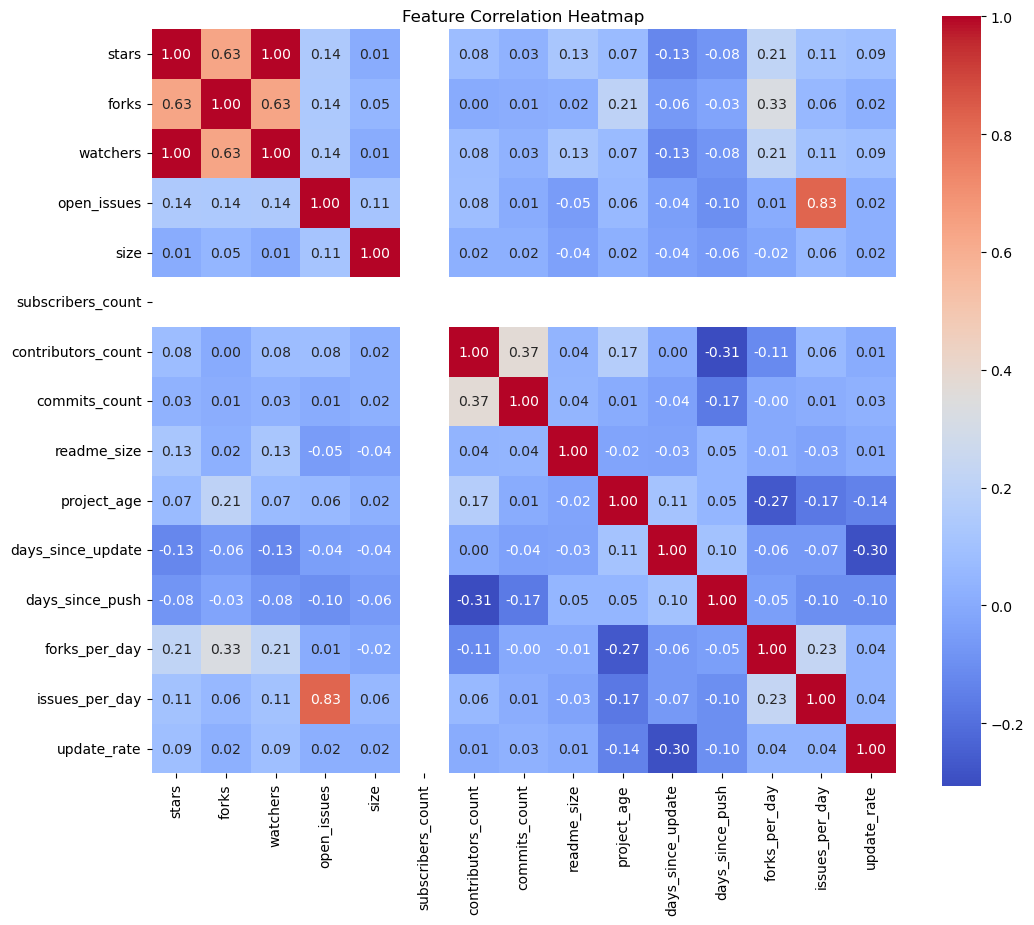

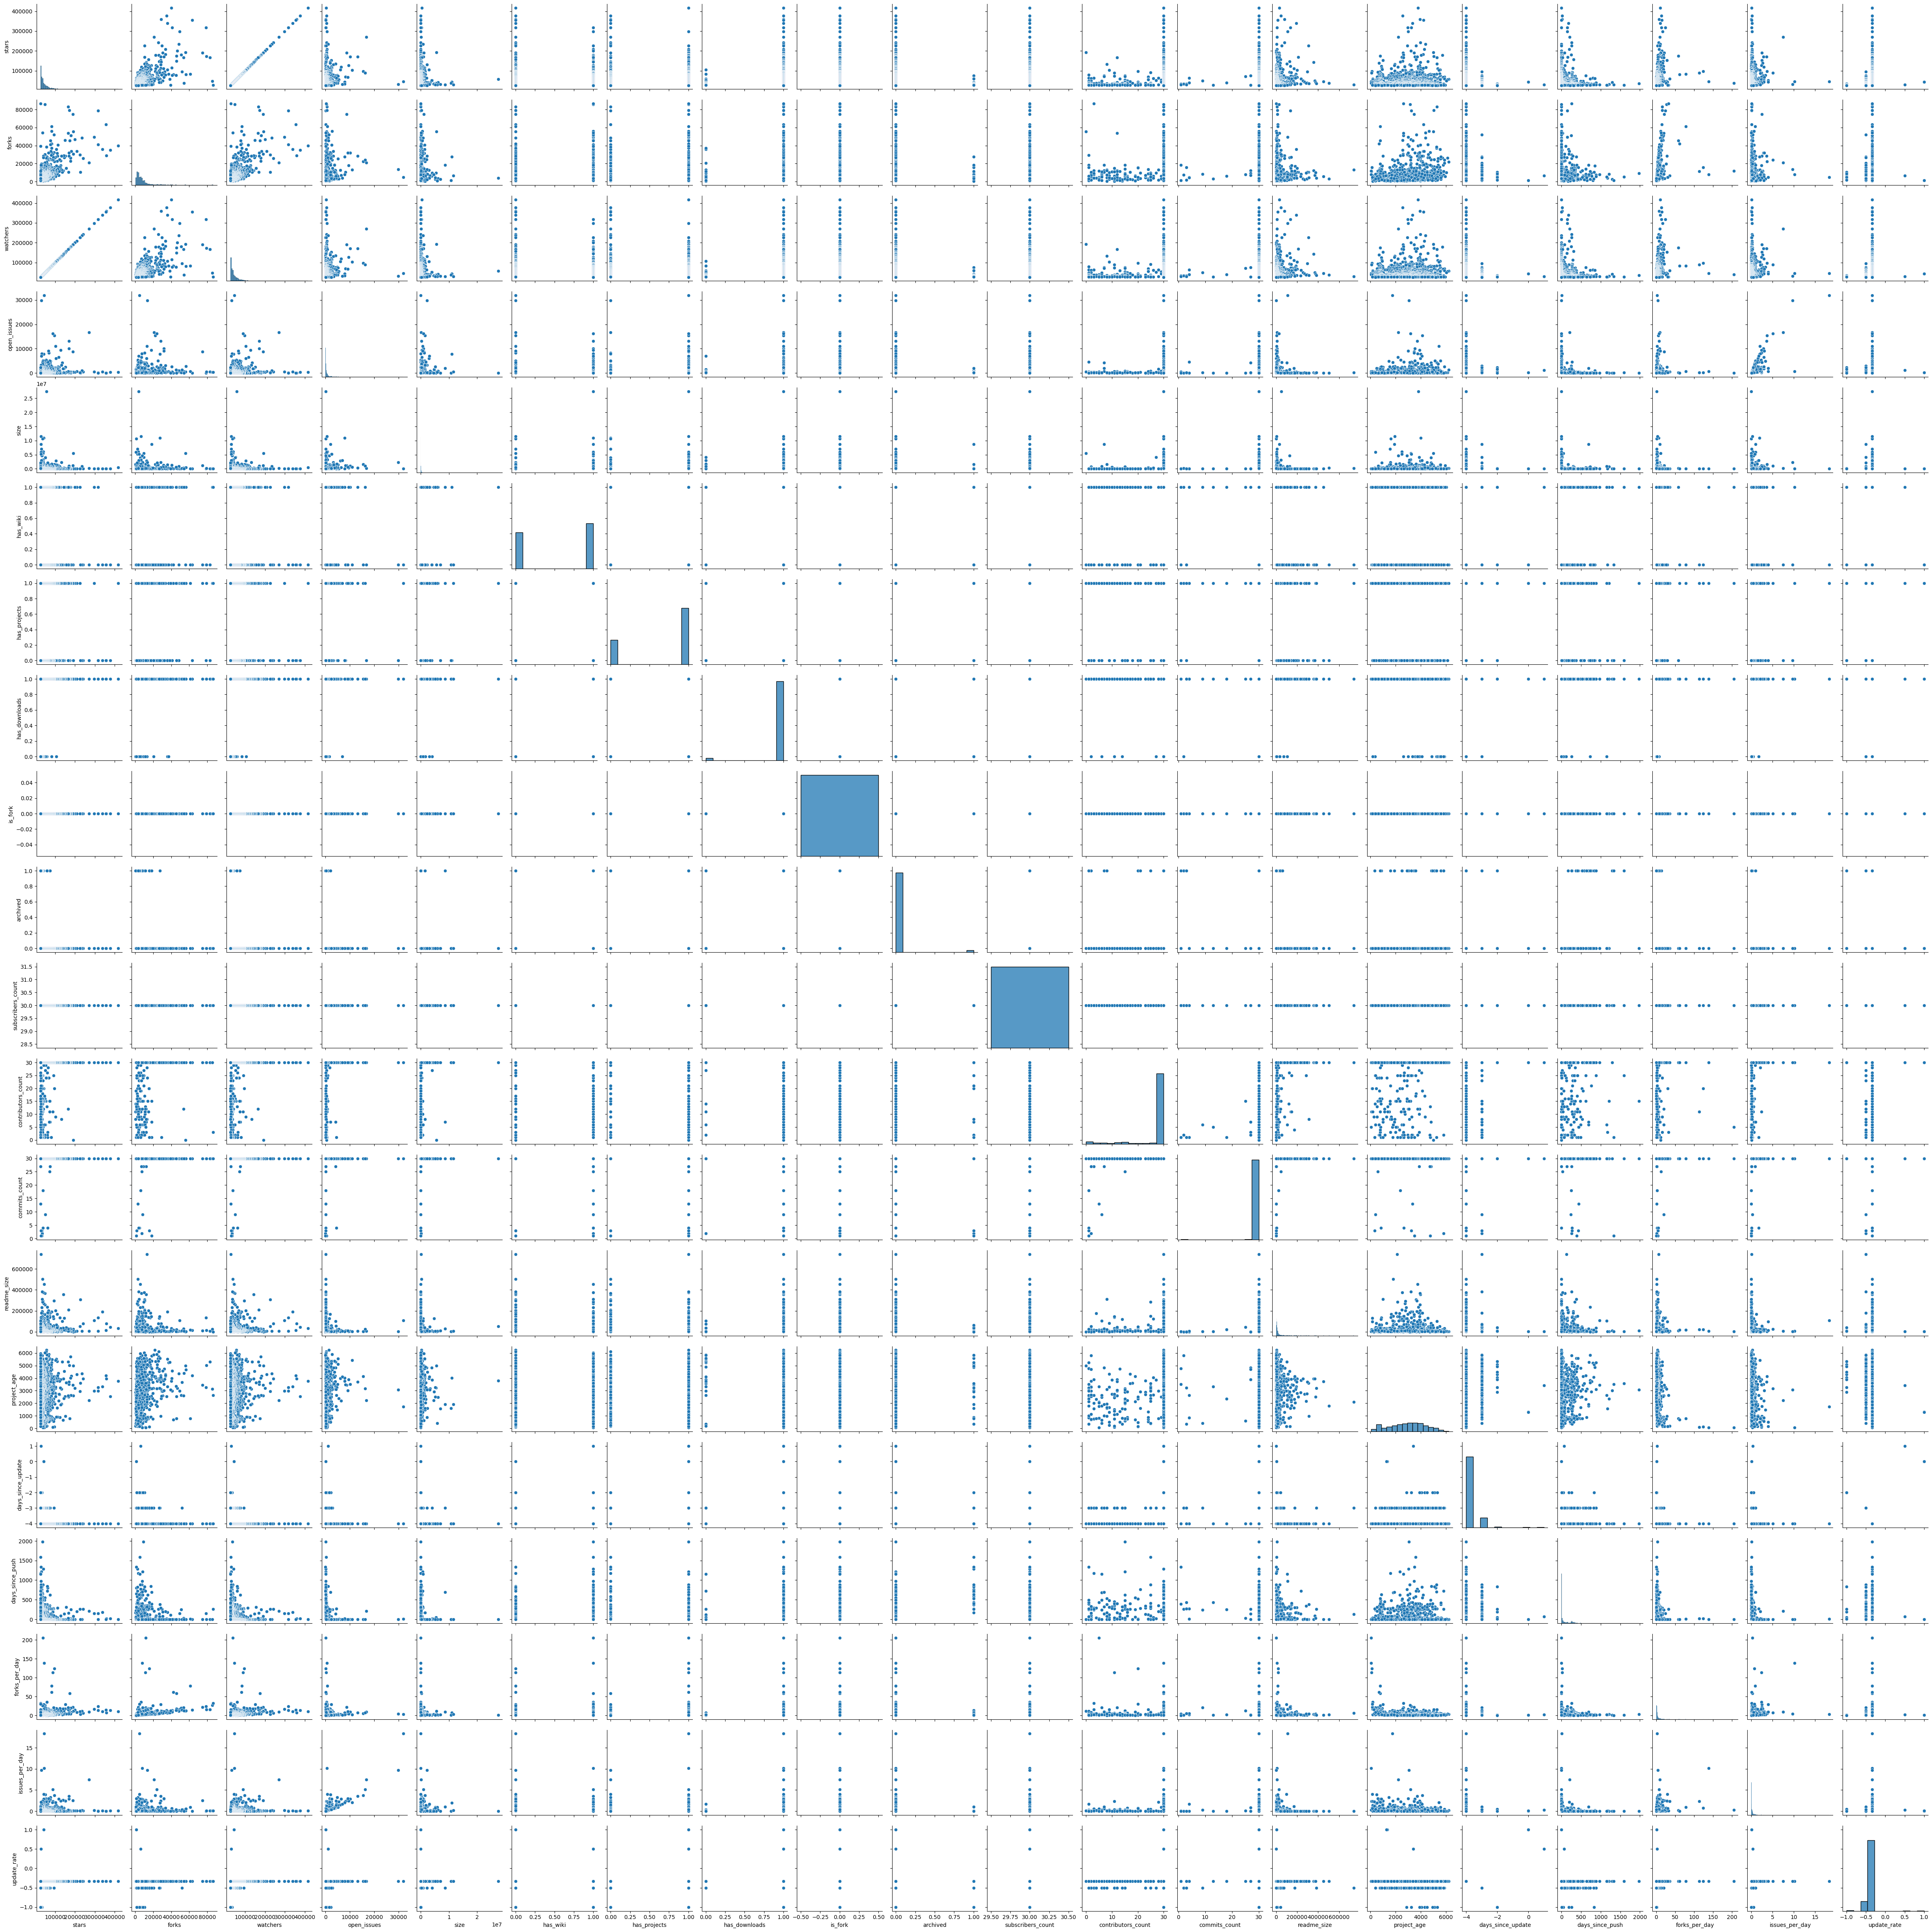

In [44]:
analyzer = GitHubRepoAnalyzer(df)

analyzer.plot_numeric_distributions() # view numeric distributions
analyzer.plot_categorical_counts() # view boolean/categorical feature distributions
analyzer.plot_correlation_heatmap() # view inter-feature correlation
analyzer.plot_pairplot() # view scatterplot matrix between first few variables

Note that watchers is the same as stars!

# Pipeline

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                             AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor)
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import joblib
import os


class GitHubRepoPreprocessor:
    """Custom preprocessing pipeline for GitHub repository metadata."""
    
    def __init__(self, reference_date=None):
        self.date = reference_date or datetime(2025, 5, 1)
        self.numeric_features = [
            'forks', 'open_issues',
            'size', 'subscribers_count', 
            'contributors_count', 'commits_count', 'readme_size',
            'project_age', 'days_since_update', 'days_since_push',
            'forks_per_day', 'issues_per_day', 'update_rate'
        ]
        self.categorical_features = ["language", "license"]
        self.column_transformer = None

    def transform(self, df):
        # Parse and normalize time-related features
        df["created_at"] = pd.to_datetime(df["created_at"]).dt.tz_localize(None)
        df["updated_at"] = pd.to_datetime(df["updated_at"]).dt.tz_localize(None)
        df["pushed_at"] = pd.to_datetime(df["pushed_at"]).dt.tz_localize(None)
        df["project_age"] = (self.date - df["created_at"]).dt.days
        df["days_since_update"] = (self.date - df["updated_at"]).dt.days
        df["days_since_push"] = (self.date - df["pushed_at"]).dt.days

        # Handle missing values
        df["license"] = df["license"].fillna("None")
        df["language"] = df["language"].fillna("Unknown")

        # Derived rate-based features
        df["forks_per_day"] = df["forks"] / (df["project_age"] + 1)
        df["issues_per_day"] = df["open_issues"] / (df["project_age"] + 1)
        df["update_rate"] = 1 / (1 + df["days_since_update"])

        # Replace inf with NaN and drop rows with NaN
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.dropna(inplace=True)

        # Selected features
        features = [
            'forks', 'open_issues',
            'size', 'has_wiki', 'has_projects', 'has_downloads', 'is_fork',
            'archived', 'language', 'license', 'subscribers_count', 
            'contributors_count', 'commits_count', 'readme_size',
            'project_age', 'days_since_update', 'days_since_push',
            'forks_per_day', 'issues_per_day', 'update_rate'
        ] # delete 'watchers'
        return df[features], df["stars"]

    def get_preprocessor(self):
        """Construct and return a fitted ColumnTransformer"""
        self.column_transformer = ColumnTransformer(
            transformers=[
                ("num", StandardScaler(), self.numeric_features),
                ("cat", OneHotEncoder(handle_unknown="ignore"), self.categorical_features)
            ]
        )
        return self.column_transformer


def train_and_evaluate_models(df, save_path="best_model.pkl"):
    """Train multiple regressors and save the best performing one."""
    preprocessor = GitHubRepoPreprocessor()
    X, y = preprocessor.transform(df)
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Preprocessing pipeline
    processor = preprocessor.get_preprocessor()

    # Candidate models
    models = {
        # Linear Models
        'Linear Regression': LinearRegression(),
        'Ridge (α=1.0)': Ridge(alpha=1.0),
        'Ridge (α=0.5)': Ridge(alpha=0.5),
        'Lasso (α=0.1)': Lasso(alpha=0.1),
        'ElasticNet (α=0.1)': ElasticNet(alpha=0.1, l1_ratio=0.5),
        
        # Tree-based Models
        'Decision Tree (max_depth=5)': DecisionTreeRegressor(max_depth=5, random_state=42),
        'Decision Tree (max_depth=10)': DecisionTreeRegressor(max_depth=10, random_state=42),
        
        # Ensemble Methods
        'Random Forest (n=100)': RandomForestRegressor(n_estimators=100, random_state=42),
        'Random Forest (n=200)': RandomForestRegressor(n_estimators=200, random_state=42),
        'Gradient Boosting (n=100)': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting (n=200)': GradientBoostingRegressor(n_estimators=200, random_state=42),
        'AdaBoost': AdaBoostRegressor(random_state=42),
        'Extra Trees': ExtraTreesRegressor(random_state=42),
        'Bagging Regressor': BaggingRegressor(random_state=42),
        
        # SVM
        'SVR (linear)': SVR(kernel='linear'),
        'SVR (rbf)': SVR(kernel='rbf'),
        'SVR (poly)': SVR(kernel='poly'),
        
        # Neighbors
        'KNN (k=3)': KNeighborsRegressor(n_neighbors=3),
        'KNN (k=5)': KNeighborsRegressor(n_neighbors=5),
        'KNN (k=10)': KNeighborsRegressor(n_neighbors=10),
        
        # Neural Networks
        'MLP (1 layer)': MLPRegressor(hidden_layer_sizes=(128,), max_iter=1000, random_state=42),
        'MLP (2 layers)': MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42),
        'MLP (3 layers)': MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42),
        'MLP (4 layers)': MLPRegressor(hidden_layer_sizes=(128, 64, 32, 16), max_iter=1000, random_state=42),
        
        # Advanced Gradient Boosting
        'XGBoost': XGBRegressor(random_state=42),
        'LightGBM': LGBMRegressor(random_state=42)
    }

    results = []
    best_model = None
    best_score = -np.inf

    for name, model in models.items():
        try:
            pipeline = Pipeline([
                ("preprocessor", processor),
                ("regressor", model)
            ])
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)

            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, y_pred)

            # Store results
            model_params = str(model.get_params())
            results.append({
                'Model': name,
                'Parameters': model_params,
                'MSE': mse,
                'RMSE': rmse,
                'MAE': mae,
                'R2': r2
            })

            # Save the best model
            if r2 > best_score:
                best_score = r2
                best_model = Pipeline([
                ("preprocessor", processor),
                ("regressor", model)
            ])
                
            print(f"{name: <30} | R2: {r2:.4f} | RMSE: {rmse:.2f}")
            
        except Exception as e:
            print(f"Error with {name}: {str(e)}")
            continue

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='R2', ascending=False)

    # Display all results
    print("\n=== All Model Results ===")
    print(results_df.to_string())

    if best_model:
        joblib.dump(best_model, save_path)
        print(f"\n Best model saved to: {os.path.abspath(save_path)}")
    
    return results_df


In [12]:
# load data
df = pd.read_csv('../1. Data Preparation/github_repo_features.csv', parse_dates=["created_at", "updated_at", "pushed_at"])
results_df = train_and_evaluate_models(df, save_path="best_model.pkl")

Linear Regression              | R2: 0.4465 | RMSE: 21676.94
Ridge (α=1.0)                  | R2: 0.4587 | RMSE: 21437.13
Ridge (α=0.5)                  | R2: 0.4550 | RMSE: 21509.53
Lasso (α=0.1)                  | R2: 0.4477 | RMSE: 21653.92
ElasticNet (α=0.1)             | R2: 0.4777 | RMSE: 21056.88
Decision Tree (max_depth=5)    | R2: 0.3657 | RMSE: 23206.40
Decision Tree (max_depth=10)   | R2: -0.0584 | RMSE: 29975.66
Random Forest (n=100)          | R2: 0.3074 | RMSE: 24249.20
Random Forest (n=200)          | R2: 0.3330 | RMSE: 23796.83
Gradient Boosting (n=100)      | R2: 0.4607 | RMSE: 21397.50
Gradient Boosting (n=200)      | R2: 0.4493 | RMSE: 21623.13
AdaBoost                       | R2: 0.0129 | RMSE: 28948.13
Extra Trees                    | R2: 0.3114 | RMSE: 24177.63
Bagging Regressor              | R2: 0.3378 | RMSE: 23710.52
SVR (linear)                   | R2: -0.1174 | RMSE: 30800.14
SVR (rbf)                      | R2: -0.1378 | RMSE: 31079.51
SVR (poly)           

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP (1 layer)                  | R2: -1.6614 | RMSE: 47533.80


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP (2 layers)                 | R2: 0.5012 | RMSE: 20577.81


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP (3 layers)                 | R2: 0.4505 | RMSE: 21598.68


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP (4 layers)                 | R2: 0.0964 | RMSE: 27697.50
XGBoost                        | R2: 0.3336 | RMSE: 23786.21
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1956
[LightGBM] [Info] Number of data points in the train set: 796, number of used features: 27
[LightGBM] [Info] Start training from score 51926.649497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

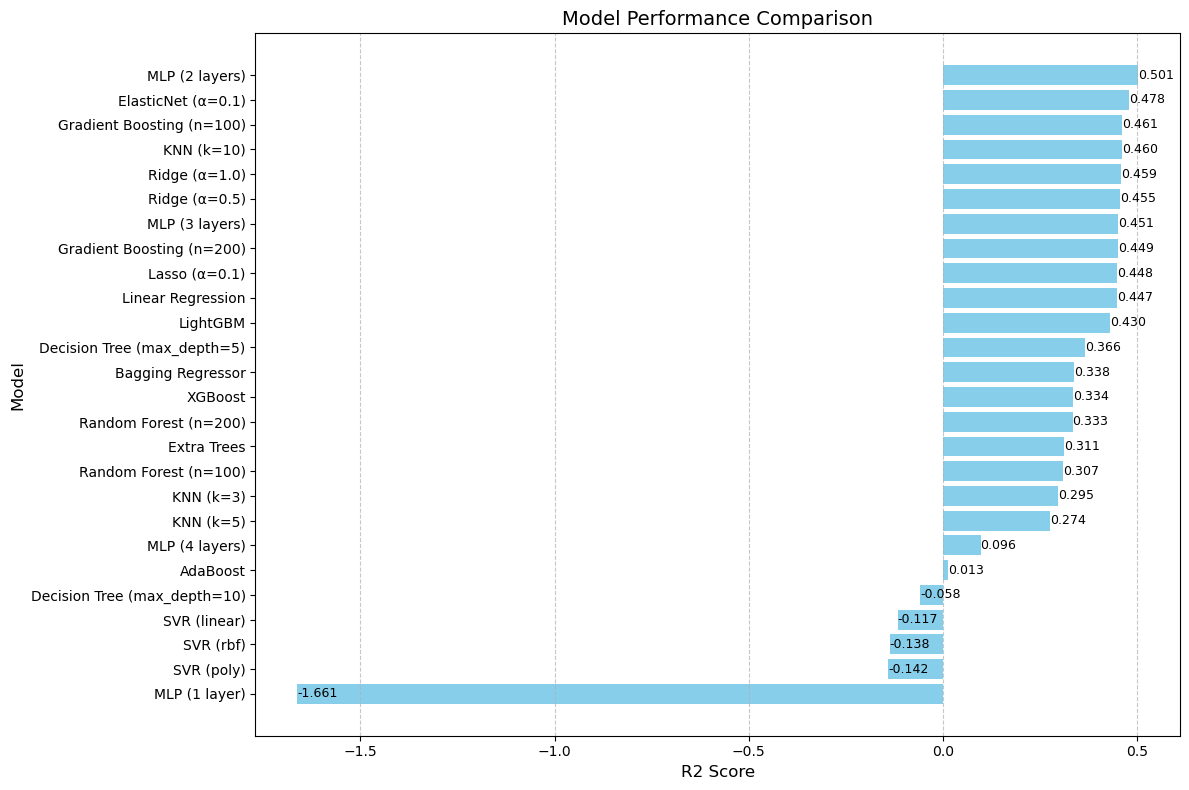

In [13]:
import matplotlib.pyplot as plt
def visualize_results(results_df):
    plt.figure(figsize=(12, 8))
    
    # Sort by R2 score and plot
    results_df = results_df.sort_values(by='R2')
    bars = plt.barh(results_df['Model'], results_df['R2'], color='skyblue')
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', 
                va='center', ha='left', fontsize=9)
    
    # Customize plot
    plt.xlabel('R2 Score', fontsize=12)
    plt.ylabel('Model', fontsize=12)
    plt.title('Model Performance Comparison', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save and show
    plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the visualization function
visualize_results(results_df)
